In [1]:
#import the required modules
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [5]:
#taking input from the user
i=int(input("Which dataset would you like to check? 1,2 or 3"))
assert i in [1,2,3]
filename="D{fname}.xlsx".format(fname=i)
print("We will analyse "+filename)

Which dataset would you like to check? 1,2 or 31
We will analyse D1.xlsx


In [8]:
#read the dataset
dataset=pd.read_excel(filename)
print("This is our dataset")
print(dataset)

This is our dataset
     Sr. No.     X1         X2 Class
0          1  717.5  43.897280    C2
1          2  702.5  49.715525    C2
2          3  587.5  32.777671    C2
3          4  272.5   5.732092    C1
4          5  477.5  36.249146    C2
..       ...    ...        ...   ...
295      296  562.5  34.467092    C2
296      297  715.0  30.833468    C2
297      298  515.0  30.139598    C2
298      299  122.5   7.420273    C1
299      300  335.0  14.865559    C1

[300 rows x 4 columns]


In [10]:
#Get C2 and C1 dataset
C2=dataset[dataset["Class"]=="C2"]
C1=dataset[dataset["Class"]=="C1"]
print("The data of class C2 is")
print(C2)
print("The data of class C1 is")
print(C1)

The data of class C2 is
     Sr. No.     X1         X2 Class
0          1  717.5  43.897280    C2
1          2  702.5  49.715525    C2
2          3  587.5  32.777671    C2
4          5  477.5  36.249146    C2
5          6  807.5  27.381482    C2
..       ...    ...        ...   ...
292      293  635.0  26.955950    C2
293      294  675.0  35.575640    C2
295      296  562.5  34.467092    C2
296      297  715.0  30.833468    C2
297      298  515.0  30.139598    C2

[150 rows x 4 columns]
The data of class C1 is
     Sr. No.     X1         X2 Class
3          4  272.5   5.732092    C1
15        16   57.5   8.386194    C1
16        17  267.5  11.551172    C1
19        20  125.0   9.455154    C1
20        21  320.0  17.201587    C1
..       ...    ...        ...   ...
287      288  350.0  16.204229    C1
290      291  167.5  15.867805    C1
294      295  187.5  17.796122    C1
298      299  122.5   7.420273    C1
299      300  335.0  14.865559    C1

[150 rows x 4 columns]


In [18]:
points=np.zeros((2,len(dataset)))
for i in dataset.index:
    points[0][i]=dataset.iloc[i]["X1"]
    points[1][i]=dataset.iloc[i]["X2"]
cov_mat=np.cov(points)
print("The covariance matrix of the dataset is")
print(cov_mat)

The covariance matrix of the dataset is
[[62551.73494983  2840.37328995]
 [ 2840.37328995   189.23508111]]


In [25]:
eigen_vals,eigen_vects=np.linalg.eig(cov_mat)

In [26]:
idx = eigen_vals.argsort()[::-1]   
eigen_vals = eigen_vals[idx]
eigen_vects = eigen_vects[:,idx]
eigen_vects=np.transpose(eigen_vects)
print("Our eigen values are")
print(eigen_vals)
print("Our eigen vectors are")
print(eigen_vects)

Our eigen values are
[6.26808358e+04 6.01342047e+01]
Our eigen vectors are
[[ 0.99896865  0.0454052 ]
 [-0.0454052   0.99896865]]


In [31]:
print("Now we will transform our data")
print("We will project this data on one of the eigen vector")
projection=np.matmul(eigen_vects,points)
print("The shape of this projection matrix is ",projection.shape)
print("The first row represents when we project data along eigen vector corresponding to highest eigen value")
print("The projection matrix is:")
print(projection)

Now we will transform our data
We will project this data on one of the eigen vector
The shape of this projection matrix is  (2, 300)
The first row represents when we project data along eigen vector corresponding to highest eigen value
The projection matrix is:
[[ 7.18753173e+02  7.04032822e+02  5.88382360e+02  2.72479224e+02
   4.78653431e+02  8.07910448e+02  7.31407217e+02  6.63755919e+02
   7.25681906e+02  4.98238428e+02  6.82976492e+02  6.26363061e+02
   6.53611633e+02  6.01619421e+02  6.95802310e+02  5.78214743e+01
   2.67748598e+02  5.48516516e+02  5.56589765e+02  1.25300395e+02
   3.20451010e+02  7.07908764e+02  5.03619338e+02  5.13750652e+02
   6.06259726e+02  6.48455071e+02  2.57887546e+02  8.21174028e+02
   5.43646855e+02  7.32894085e+02  4.86646988e+02  7.46428388e+02
   6.80997706e+02  5.01239650e+02  6.41293814e+02  6.58351326e+02
   2.85378750e+02  5.76132263e+02  7.93181758e+02  5.46570520e+02
   2.20243356e+02  5.93516353e+02  6.86069797e+02  2.75096786e+02
   6.91413653

In [38]:
##Splitting data with the help of python dictionary
C1={}
C2={}
for i in dataset.index:
    if dataset.iloc[i]["Class"]=="C1":
        C1[i]=True
    else:
        C2[i]=True

In [39]:
##Checking for classification property of eigen vector1
p1=projection[0]
l=[]
for i in range(len(p1)):
    l.append([p1[i],i])
l.sort(key=lambda a:a[0])
stack=[]
for i in l:
    if stack==[]:
        if i[1] in C1.keys():
            stack.append("C1")
        else:
            stack.append("C2")
        continue
    cat=None
    if i[1] in C1.keys():
        cat="C1"
    else:
        cat="C2"
    if stack[-1]==cat:
        stack.append(cat)
    if stack[-1]!=cat:
        break
if len(stack)==len(C1) or len(stack)==len(C2):
    print("Can be classified")
else:
    print("Cannot be classified")

Can be classified


In [40]:
p1=projection[1]
l=[]
for i in range(len(p1)):
    l.append([p1[i],i])
l.sort(key=lambda a:a[0])
stack=[]
for i in l:
    if stack==[]:
        if i[1] in C1.keys():
            stack.append("C1")
        else:
            stack.append("C2")
        continue
    cat=None
    if i[1] in C1.keys():
        cat="C1"
    else:
        cat="C2"
    if stack[-1]==cat:
        stack.append(cat)
    if stack[-1]!=cat:
        break
if len(stack)==len(C1) or len(stack)==len(C2):
    print("Can be classified")
else:
    print("Cannot be classified")

Cannot be classified


## Data Viz

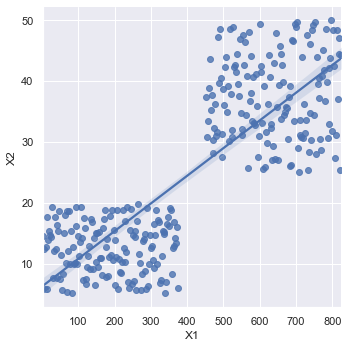

In [65]:
#the dataset
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
b=sns.lmplot(data=dataset,x="X1",y="X2")
b.set_title("The Original Dataset",fontsize=19,fontweight="bold")
b.set_ylabel("X2",fontweight="bold",fontsize=15)
b.set_xlabel("X1",fontweight="bold",fontsize=15)